<a href="https://colab.research.google.com/github/Mrif123/MNSIT-Handwritten-Digit-Classification/blob/main/MNSIT_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 MNSIT Handwritten Digit Classification Using Deep Learning(Neural Networks)

 Importing the Dependencies



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# shape of the numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)



*   Training Images-60000

*   Test Images-10000






*   Image Dimension-->28*28
*   GrayScale Image->1 channel



In [ ]:
#printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


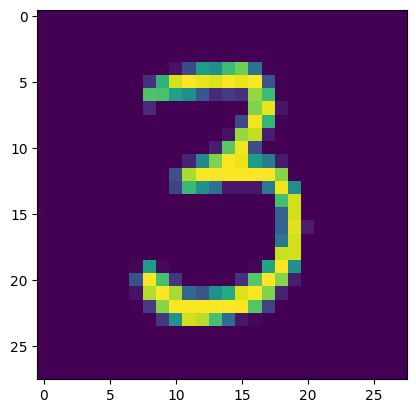

3


In [ ]:
#displaying the image
plt.imshow(x_train[50])
plt.show()

#print the corresponding label
print(y_train[50])

Image Labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in Y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


One Hot Encoding

In [ ]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
#setting up the layers of the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#teaining the neural network
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2924 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1024 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0673 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0576 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

Accuracy on Test Data

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9731
0.9731000065803528


In [ ]:
print(x_test.shape)

(10000, 28, 28)


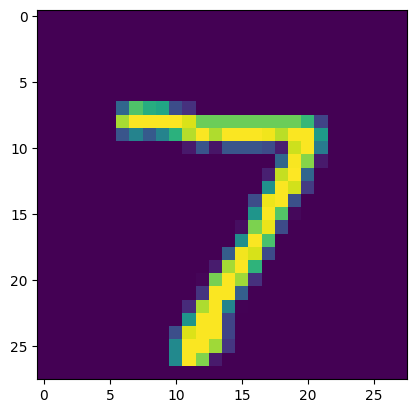

In [ ]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[3.7070233e-02 2.6728550e-04 7.5554085e-01 2.6154613e-01 2.5927840e-05
 2.5082326e-01 1.6488569e-07 9.9999905e-01 1.4520669e-02 8.1478345e-01]


In [ ]:
#converting the prediction probabilities to class label
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(y_pred)

[[3.7070233e-02 2.6728550e-04 7.5554085e-01 ... 9.9999905e-01
  1.4520669e-02 8.1478345e-01]
 [1.5481607e-04 9.9461246e-01 1.0000000e+00 ... 3.8325440e-02
  2.7986032e-01 1.3435675e-05]
 [3.4366446e-04 9.9997717e-01 4.7558945e-01 ... 7.6834285e-01
  6.3150233e-01 3.3522986e-02]
 ...
 [1.9544810e-10 1.9567210e-04 5.6163549e-07 ... 5.8063948e-01
  1.6542180e-01 9.9987799e-01]
 [1.5958514e-07 1.4424606e-05 7.4837692e-09 ... 1.6171779e-04
  9.9597448e-01 7.7098750e-02]
 [4.5191595e-01 1.5067939e-05 5.4524289e-03 ... 1.0618144e-10
  4.3592363e-04 8.5545318e-05]]


Confusion Matrix

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 967    1    2    1    2    3    1    0    1    2]
 [   0 1118    3    0    0    3    1    0   10    0]
 [   0    2 1006    4    3    0    3    3   10    1]
 [   0    0    3  972    0   21    0    6    4    4]
 [   1    0    3    0  955    2    2    1    3   15]
 [   2    0    0    6    1  877    1    1    3    1]
 [   6    3    0    1    8   24  913    0    3    0]
 [   1    3    9    2    3    0    0 1002    3    5]
 [   4    0    3    2    6   16    0    2  937    4]
 [   3    2    0    3   10    3    1    4    0  983]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

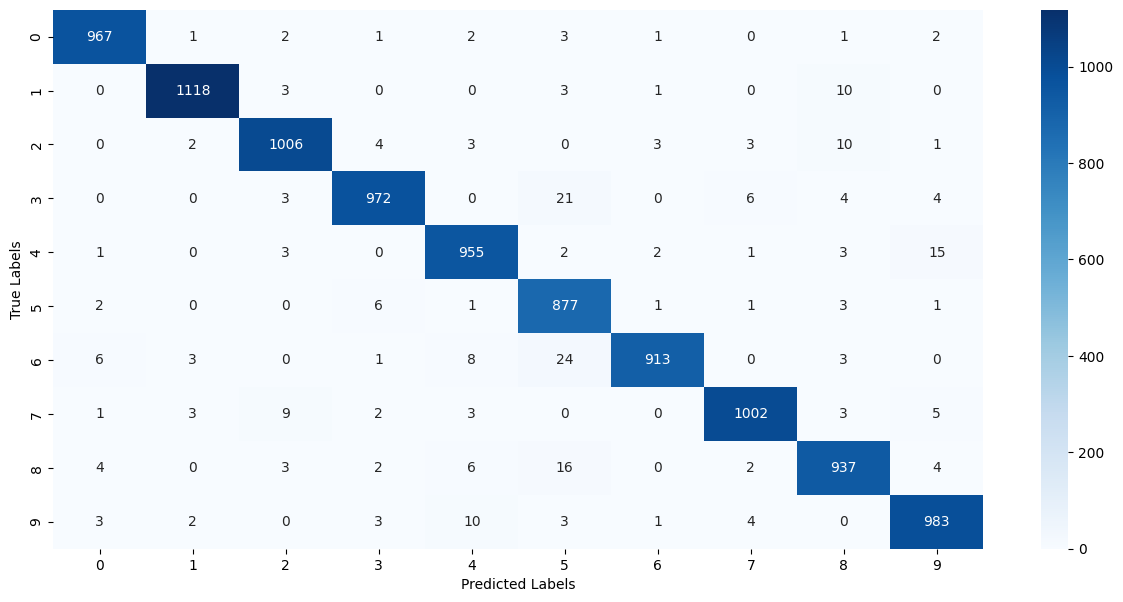

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [ ]:
input_image_path='/content/image.png'
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[19 19 19]
  [19 19 19]
  [51 51 51]
  ...
  [51 51 51]
  [51 51 51]
  [19 19 19]]]


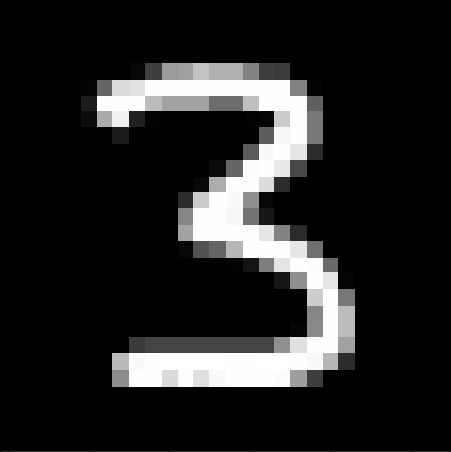

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(452, 451, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(452, 451)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 28ms/step
[[3.3887480e-12 1.2012198e-01 1.9677703e-01 1.0000000e+00 3.6158045e-08
  1.1496986e-02 1.2362762e-17 5.9789356e-02 1.3264427e-01 8.9719015e-01]]


In [ ]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


Enter the path of the image to be predicted:/content/image.png


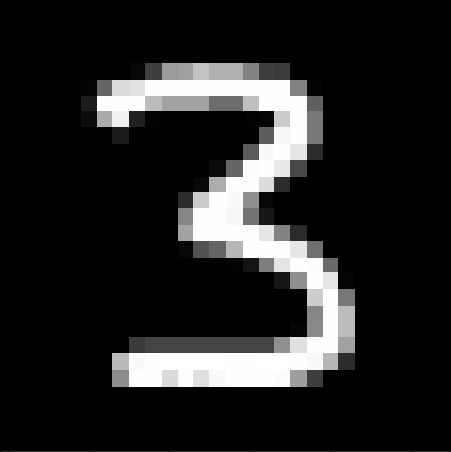

1/1 [==============================] - 0s 21ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path=input('Enter the path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ',input_pred_label)